In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd


df = pd.read_csv('/content/drive/MyDrive/Python_google_colab/archive (2)/archive_NLP/Corona_NLP_test.csv')

In [3]:
df_train = pd.read_csv('/content/drive/MyDrive/Python_google_colab/archive (2)/archive_NLP/Corona_NLP_train.csv',encoding = "ISO-8859-1")

In [4]:
df_train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


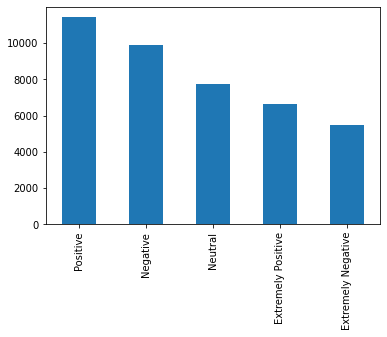

In [5]:
import matplotlib.pyplot as plt

df_train['Sentiment'].value_counts().plot.bar()

In [ ]:
df_train['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [ ]:
df_train['OriginalTweet'][1]

'advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order'

In [ ]:
df_train['OriginalTweet'][4]

"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n"

In [ ]:
df_train['Location'].value_counts()

London                     540
United States              528
London, England            520
New York, NY               395
Washington, DC             373
                          ... 
JAPAN                        1
Private jet                  1
South Pasadena, CA           1
Where My Daughter Is..       1
Siksika Territory            1
Name: Location, Length: 12220, dtype: int64

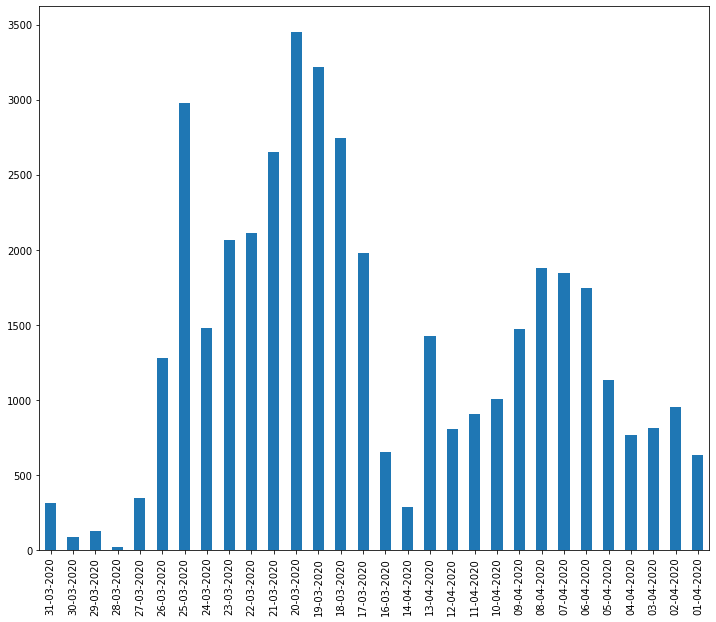

In [ ]:
plt.figure(figsize= (12,10))
df_train['TweetAt'].value_counts().sort_index(ascending=False).plot.bar()

In [ ]:
df_train.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [ ]:
###############NOTE: location is having null values ,we can drop location ,uname ,sname, tweetat

In [ ]:
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()

In [ ]:
b = lr.fit_transform(df_train['Sentiment'])

In [ ]:
df_train['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [ ]:
type(b)

numpy.ndarray

In [ ]:
df_train['target'] = pd.DataFrame(b)

In [ ]:
df_train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,target
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,3
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,4
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,4
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,4
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,0


In [ ]:
df_train['target'].value_counts()

4    11422
2     9917
3     7713
1     6624
0     5481
Name: target, dtype: int64

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
  
import re
ps = PorterStemmer()
corpus = []
for i in range(0, len(df_train)):
    review = re.sub('[^a-zA-Z]', ' ', df_train['OriginalTweet'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df_train.shape


(41157, 6)

In [ ]:
corpus[0:10]

['menyrbi phil gahan chrisitv http co ifz fan pa http co xx ghgfzcc http co nlzdxno',
 'advic talk neighbour famili exchang phone number creat contact list phone number neighbour school employ chemist gp set onlin shop account poss adequ suppli regular med order',
 'coronaviru australia woolworth give elderli disabl dedic shop hour amid covid outbreak http co binca vp p',
 'food stock one empti pleas panic enough food everyon take need stay calm stay safe covid franc covid covid coronaviru confin confinementot confinementgener http co zrlg z j',
 'readi go supermarket covid outbreak paranoid food stock litterali empti coronaviru seriou thing pleas panic caus shortag coronavirusfr restezchezv stayathom confin http co usmualq n',
 'news region first confirm covid case came sullivan counti last week peopl flock area store purchas clean suppli hand sanit food toilet paper good tim dodson report http co cfxch lu',
 'cashier groceri store share insight covid prove credibl comment civic class

In [ ]:

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features= 2000,ngram_range=(1,4))
X = cv.fit_transform(corpus).toarray()

In [ ]:
X.shape

(41157, 2000)

In [ ]:
X[0]

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y = df_train['target']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


from sklearn.naive_bayes import MultinomialNB
mb = MultinomialNB(alpha=0.5)
mb.fit(X_train, y_train)

y_pred=mb.predict(X_test)


from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_pred,y_test))

print("TRAIN DATA accuracy:", mb.score(X_train,y_train))

print("TEST data accuracy: ", mb.score(X_test,y_test))

[[ 853   47  633   95  195]
 [  49 1102  203  101  748]
 [ 443  126 1094  341  585]
 [ 103  159  551 1385  700]
 [ 124  555  524  370 1262]]
TRAIN DATA accuracy: 0.526293866500052
TEST data accuracy:  0.46128927761580824


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(ngram_range= (1,5),max_features= 4000)
x_new = tf.fit_transform(corpus).toarray()

X_final = pd.DataFrame(x_new, columns= tf.get_feature_names())

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=42)

from sklearn.naive_bayes import MultinomialNB
mb = MultinomialNB(alpha= 0.7)
mb.fit(X_train, y_train)

y_pred_tfid = mb.predict(X_test)


from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_pred_tfid,y_test))

print("TRAIN DATA accuracy:", mb.score(X_train,y_train))

print("TEST data accuracy: ", mb.score(X_test,y_test))

[[ 325    3  143   11   27]
 [   4  523   46   21  188]
 [ 921  124 1473  407  597]
 [  58   74  278  999  334]
 [ 264 1265 1065  854 2344]]
TRAIN DATA accuracy: 0.5403519733416641
TEST data accuracy:  0.4586977648202138


In [ ]:
type(X)

numpy.ndarray

In [ ]:
df_new = pd.concat([df_train['OriginalTweet'],df_train['Sentiment']],axis=1)

In [ ]:
df_new.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
df_new.replace({'Sentiment' : { 'Extremely Negative' :'N', 'Negative' : 'N', 'Neutral' : 'K' ,'Extremely Positive' : 'P', 'Positive' : 'P'}} ,inplace=True )


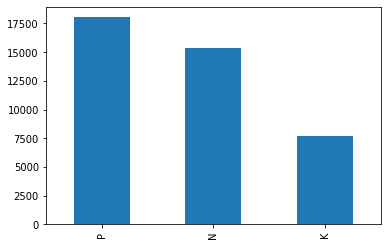

In [ ]:
df_new['Sentiment'].value_counts().plot.bar()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features= 2000,ngram_range=(1,4))
X = cv.fit_transform(corpus).toarray()


y = df_new['Sentiment']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)




In [ ]:
from sklearn.naive_bayes import MultinomialNB
mb = MultinomialNB()
mb.fit(X_train, y_train)

y_pred=mb.predict(X_test)


from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_pred,y_test))

print("TRAIN DATA accuracy:", mb.score(X_train,y_train))

print("TEST data accuracy: ", mb.score(X_test,y_test))

[[1349  660  840]
 [ 442 3066  919]
 [ 501  851 3720]]
TRAIN DATA accuracy: 0.6822520740046514
TEST data accuracy:  0.658811143505021


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(ngram_range= (1,4),max_features= 2800)
x_new = tf.fit_transform(corpus).toarray()

X_final = pd.DataFrame(x_new, columns= tf.get_feature_names())

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=42)

from sklearn.naive_bayes import MultinomialNB
mb = MultinomialNB()
mb.fit(X_train, y_train)

y_pred_tfid = mb.predict(X_test)


from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_pred_tfid,y_test))

print("TRAIN DATA accuracy:", mb.score(X_train,y_train))

print("TEST data accuracy: ", mb.score(X_test,y_test))

[[ 692  162  184]
 [ 557 3180  800]
 [1043 1235 4495]]
TRAIN DATA accuracy: 0.7026970738310945
TEST data accuracy:  0.6775996112730807


In [ ]:
alpha = [ 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
score = []
for i in alpha:
  mb = MultinomialNB(alpha=i)
  mb.fit(X_train, y_train)
  y_pred_tfid = mb.predict(X_test)
  print("alpha is: ",i)
  print("TRAIN DATA accuracy:", mb.score(X_train,y_train))
  print("TEST data accuracy: ", mb.score(X_test,y_test))
  score.append(mb.score(X_test,y_test))
  

alpha is:  0.1
TRAIN DATA accuracy: 0.7105765559373807
TEST data accuracy:  0.6815678652413346
alpha is:  0.2
TRAIN DATA accuracy: 0.7095352146898538
TEST data accuracy:  0.6818108195659216
alpha is:  0.3
TRAIN DATA accuracy: 0.7087021416918324
TEST data accuracy:  0.6813249109167476
alpha is:  0.4
TRAIN DATA accuracy: 0.7084938734423271
TEST data accuracy:  0.6803530936183998
alpha is:  0.5
TRAIN DATA accuracy: 0.70731368669513
TEST data accuracy:  0.6804340783932621
alpha is:  0.6
TRAIN DATA accuracy: 0.7067235933215315
TEST data accuracy:  0.6789763524457402
alpha is:  0.7
TRAIN DATA accuracy: 0.7058210975736748
TEST data accuracy:  0.6788143828960156
alpha is:  0.8
TRAIN DATA accuracy: 0.7049880245756535
TEST data accuracy:  0.6779235503725299
alpha is:  0.9
TRAIN DATA accuracy: 0.7034260127043632
TEST data accuracy:  0.6778425655976676


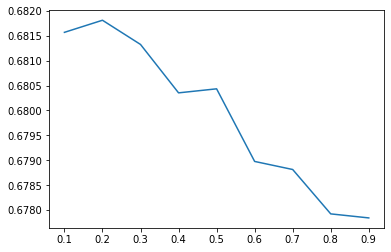

In [ ]:
plt.plot(alpha,score)

In [165]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
  
import re
wnl = WordNetLemmatizer()
corpus1 = []
for i in range(0, len(df_train)):
    
    review = re.sub(r'http\S+', ' ', df_train['OriginalTweet'][i])   # remove urls
    review = re.sub('[^a-zA-Z]', ' ', review)
    review = review.lower()
    review = review.split()
    
    review = [wnl.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus1.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [167]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

def preprocess(sentence):
  sentence=str(sentence)
  sentence = sentence.lower()
  sentence=sentence.replace('{html}',"") 
  cleanr = re.compile('<.*?>')
  cleantext = re.sub(cleanr, '', sentence)
  rem_url=re.sub(r'http\S+', '',cleantext)
  rem_num = re.sub('[0-9]+', '', rem_url)
  tokenizer = RegexpTokenizer(r'\w+')
  tokens = tokenizer.tokenize(rem_num)  
  filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
  stem_words=[stemmer.stem(w) for w in filtered_words]
  lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
  return " ".join(filtered_words)


df_train['cleanText']=df_train['OriginalTweet'].map(lambda s:preprocess(s)) 

In [168]:
df_train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,cleanText
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,menyrbie phil_gahan chrisitv
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice talk neighbours family exchange phone n...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworths give elderly ...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,food stock one empty please panic enough food ...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,ready supermarket covid outbreak paranoid food...


In [172]:
df_train['cleanText'][4]

'ready supermarket covid outbreak paranoid food stock litteraly empty coronavirus serious thing please panic causes shortage coronavirusfrance restezchezvous stayathome confinement'

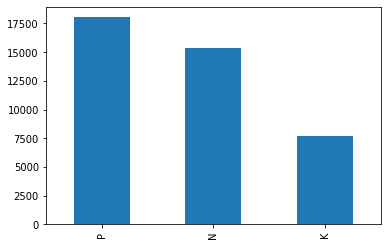

In [140]:
df_new = pd.concat([df_train['OriginalTweet'],df_train['Sentiment']],axis=1)
df_new.replace({'Sentiment' : { 'Extremely Negative' :'N', 'Negative' : 'N', 'Neutral' : 'K' ,'Extremely Positive' : 'P', 'Positive' : 'P'}} ,inplace=True )

df_new['Sentiment'].value_counts().plot.bar()

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(ngram_range= (1,4),max_features= 2500)
x_new = tf.fit_transform(corpus1).toarray()

X_final = pd.DataFrame(x_new, columns= tf.get_feature_names())
y= df_new['Sentiment']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=42)

from sklearn.naive_bayes import MultinomialNB
mb = MultinomialNB()
mb.fit(X_train, y_train)

y_pred_tfid = mb.predict(X_test)


from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_pred_tfid,y_test))

print("TRAIN DATA accuracy:", mb.score(X_train,y_train))

print("TEST data accuracy: ", mb.score(X_test,y_test))

[[ 721  189  175]
 [ 582 3099  802]
 [ 989 1289 4502]]
TRAIN DATA accuracy: 0.700128432087195
TEST data accuracy:  0.673955296404276


In [11]:
alpha = [ 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
score1 = []
for i in alpha:
  mb = MultinomialNB(alpha=i)
  mb.fit(X_train, y_train)
  y_pred_tfid = mb.predict(X_test)
  print("alpha is: ",i)
  print("TRAIN DATA accuracy:", mb.score(X_train,y_train))
  print("TEST data accuracy: ", mb.score(X_test,y_test))
  score1.append(mb.score(X_test,y_test))

alpha is:  0.1
TRAIN DATA accuracy: 0.7102641535631227
TEST data accuracy:  0.6784904437965662
alpha is:  0.2
TRAIN DATA accuracy: 0.7092575236905134
TEST data accuracy:  0.677437641723356
alpha is:  0.3
TRAIN DATA accuracy: 0.7082161824429866
TEST data accuracy:  0.6768707482993197
alpha is:  0.4
TRAIN DATA accuracy: 0.7070707070707071
TEST data accuracy:  0.6770327178490444
alpha is:  0.5
TRAIN DATA accuracy: 0.7067235933215315
TEST data accuracy:  0.6765468091998704
alpha is:  0.6
TRAIN DATA accuracy: 0.7060293658231802
TEST data accuracy:  0.6761418853255587
alpha is:  0.7
TRAIN DATA accuracy: 0.7047450449512305
TEST data accuracy:  0.6749271137026239
alpha is:  0.8
TRAIN DATA accuracy: 0.7040855288277968
TEST data accuracy:  0.6749271137026239
alpha is:  0.9
TRAIN DATA accuracy: 0.7030094762053525
TEST data accuracy:  0.6737933268545514
alpha is:  1.0
TRAIN DATA accuracy: 0.7025929397063417
TEST data accuracy:  0.673469387755102


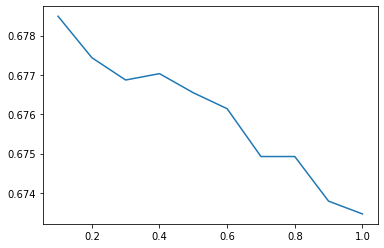

In [12]:
plt.plot(alpha,score1)

In [18]:
len(corpus1)

41157

In [22]:

from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [23]:
size_voc = 5000

onehot_repr=[one_hot(words,size_voc)for words in corpus1] 
onehot_repr[0]

[966,
 736,
 3503,
 3001,
 3907,
 2197,
 1783,
 2563,
 3764,
 3907,
 2197,
 4085,
 685,
 3907,
 2197,
 3860]

In [148]:

sent_length=25
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 3907 2197 3860]
 [3949 2259 4163 ... 3391 1344  665]
 [   0    0    0 ... 1633 4395  381]
 ...
 [   0    0    0 ... 3141 2589 2009]
 [   0    0    0 ... 3582  698 3582]
 [ 986 2822 2982 ... 2827  698  208]]


In [149]:
embedded_docs[1]

array([3949, 2259, 4163,  765, 1732, 4422,  722, 4104,  765, 1732, 3949,
       2704, 3744, 3333, 2753, 4703, 4145, 1249, 4172, 1722, 1103, 1122,
       3391, 1344,  665], dtype=int32)

In [151]:
from tensorflow.keras.layers import Dropout
from keras.layers import LSTM,Bidirectional
## Creating model
embedding_vector_features=100
model=Sequential()
model.add(Embedding(size_voc,embedding_vector_features,input_length=sent_length))
#model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(100)))
model.add(Dropout(0.3))

model.add(Dense(1,activation='softmax'))
model.compile(loss='SparseCategoricalCrossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_25 (Embedding)     (None, 25, 100)           500000    
_________________________________________________________________
module_wrapper_5 (ModuleWrap (None, 200)               160800    
_________________________________________________________________
dropout_16 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 201       
Total params: 661,001
Trainable params: 661,001
Non-trainable params: 0
_________________________________________________________________
None


In [152]:
import numpy as np
X_final_lstm = np.array(embedded_docs)
print(X_final_lstm.shape)

(41157, 25)


In [153]:

y = df_new['Sentiment']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final_lstm, y, test_size=0.33, random_state=42)

In [154]:

model.fit(X_train,y_train,epochs=5,validation_data=(X_test,y_test),batch_size=50)

Epoch 1/5
552/552 [==============================] - 23s 36ms/step - loss: nan - accuracy: 0.3751 - val_loss: nan - val_accuracy: 0.3720
Epoch 2/5
552/552 [==============================] - 19s 34ms/step - loss: nan - accuracy: 0.3752 - val_loss: nan - val_accuracy: 0.3720
Epoch 3/5
552/552 [==============================] - 19s 34ms/step - loss: nan - accuracy: 0.3752 - val_loss: nan - val_accuracy: 0.3720
Epoch 4/5
552/552 [==============================] - 19s 34ms/step - loss: nan - accuracy: 0.3752 - val_loss: nan - val_accuracy: 0.3720
Epoch 5/5
552/552 [==============================] - 19s 34ms/step - loss: nan - accuracy: 0.3752 - val_loss: nan - val_accuracy: 0.3720


In [131]:
################### test data prediction #####################################
y_pred=model.predict_classes(X_test)
from sklearn.metrics import confusion_matrix
print("confusion-matrix:\n" ,confusion_matrix(y_test,y_pred))
from sklearn.metrics import accuracy_score
print("accuracy_score:", accuracy_score(y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


confusion-matrix:
 [[   0 2518    0]
 [   0 5053    0]
 [   0 6011    0]]
accuracy_score: 0.37203651892210277


In [141]:
df_new.replace({'Sentiment' : { 'K':2 ,'P':1 ,'N':0}} ,inplace=True )

In [102]:
df_new.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,K
1,advice Talk to your neighbours family to excha...,P
2,Coronavirus Australia: Woolworths to give elde...,P
3,My food stock is not the only one which is emp...,P
4,"Me, ready to go at supermarket during the #COV...",N


In [142]:
df_new.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,2
1,advice Talk to your neighbours family to excha...,1
2,Coronavirus Australia: Woolworths to give elde...,1
3,My food stock is not the only one which is emp...,1
4,"Me, ready to go at supermarket during the #COV...",0


In [136]:
 from tensorflow.keras.layers import GRU,Bidirectional,GlobalMaxPool1D
embedding_vector_features=50
model1=Sequential()
model1.add(Embedding(size_voc,embedding_vector_features,input_length=sent_length))
model1.add(Bidirectional(GRU(256)))

model1.add(Dropout(0.4))
model1.add(Dense(1,activation='softmax'))
model1.compile(loss='SparseCategoricalCrossentropy',optimizer='adam',metrics=['accuracy'])
print(model1.summary())

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_22 (Embedding)     (None, 30, 50)            250000    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 512)               473088    
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 513       
Total params: 723,601
Trainable params: 723,601
Non-trainable params: 0
_________________________________________________________________
None


In [137]:

model1.fit(X_train,y_train,epochs=5,validation_data=(X_test,y_test),batch_size=64)

Epoch 1/5
431/431 [==============================] - 22s 43ms/step - loss: nan - accuracy: 0.3756 - val_loss: nan - val_accuracy: 0.3720
Epoch 2/5
431/431 [==============================] - 18s 41ms/step - loss: nan - accuracy: 0.3752 - val_loss: nan - val_accuracy: 0.3720
Epoch 3/5
431/431 [==============================] - 18s 41ms/step - loss: nan - accuracy: 0.3752 - val_loss: nan - val_accuracy: 0.3720
Epoch 4/5
431/431 [==============================] - 18s 42ms/step - loss: nan - accuracy: 0.3752 - val_loss: nan - val_accuracy: 0.3720
Epoch 5/5
431/431 [==============================] - 18s 41ms/step - loss: nan - accuracy: 0.3752 - val_loss: nan - val_accuracy: 0.3720


In [138]:
y_train

21430    0
19794    1
8902     0
7042     0
7627     1
        ..
6265     0
11284    0
38158    0
860     -1
15795    0
Name: Sentiment, Length: 27575, dtype: int64

In [173]:
df_final = pd.concat([df_train['cleanText'],df_train['Sentiment']],axis=1)

In [174]:
df_final.head()

,cleanText,Sentiment
0,menyrbie phil_gahan chrisitv,Neutral
1,advice talk neighbours family exchange phone n...,Positive
2,coronavirus australia woolworths give elderly ...,Positive
3,food stock one empty please panic enough food ...,Positive
4,ready supermarket covid outbreak paranoid food...,Extremely Negative


In [177]:
df_final.replace({'Sentiment' :{ 'Extremely Negative' :0, 'Negative' : 0, 'Neutral' : 1 ,'Extremely Positive' : 2, 'Positive' : 2}} ,inplace=True )

In [178]:
df_final.head()

,cleanText,Sentiment
0,menyrbie phil_gahan chrisitv,1
1,advice talk neighbours family exchange phone n...,2
2,coronavirus australia woolworths give elderly ...,2
3,food stock one empty please panic enough food ...,2
4,ready supermarket covid outbreak paranoid food...,0


In [180]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(ngram_range= (1,4),max_features= 2500)
x_new = tf.fit_transform(df_final['cleanText'])


y= df_final['Sentiment']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_new, y, test_size=0.3, random_state=42)

from sklearn.naive_bayes import MultinomialNB
mb = MultinomialNB()
mb.fit(X_train, y_train)

y_pred_tfid = mb.predict(X_test)


from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_pred_tfid,y_test))

print("TRAIN DATA accuracy:", mb.score(X_train,y_train))

print("TEST data accuracy: ", mb.score(X_test,y_test))

[[3119  626  827]
 [ 153  611  139]
 [1305 1055 4513]]
TRAIN DATA accuracy: 0.6975250789683779
TEST data accuracy:  0.6675574991901523


In [181]:
alpha = [ 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
score1 = []
for i in alpha:
  mb = MultinomialNB(alpha=i)
  mb.fit(X_train, y_train)
  y_pred_tfid = mb.predict(X_test)
  print("alpha is: ",i)
  print("TRAIN DATA accuracy:", mb.score(X_train,y_train))
  print("TEST data accuracy: ", mb.score(X_test,y_test))
  score1.append(mb.score(X_test,y_test))

alpha is:  0.1
TRAIN DATA accuracy: 0.7051268700753237
TEST data accuracy:  0.6716877227081308
alpha is:  0.2
TRAIN DATA accuracy: 0.7042590857023847
TEST data accuracy:  0.670715905409783
alpha is:  0.3
TRAIN DATA accuracy: 0.703287167204693
TEST data accuracy:  0.6708778749595076
alpha is:  0.4
TRAIN DATA accuracy: 0.7023499600819189
TEST data accuracy:  0.6699060576611597
alpha is:  0.5
TRAIN DATA accuracy: 0.7013433302093096
TEST data accuracy:  0.6694201490119858
alpha is:  0.6
TRAIN DATA accuracy: 0.7001631434621125
TEST data accuracy:  0.6682863621639132
alpha is:  0.7
TRAIN DATA accuracy: 0.6995036273386789
TEST data accuracy:  0.6682863621639132
alpha is:  0.8
TRAIN DATA accuracy: 0.6990870908396681
TEST data accuracy:  0.6678004535147393
alpha is:  0.9
TRAIN DATA accuracy: 0.6983234405914819
TEST data accuracy:  0.6677194687398769
alpha is:  1.0
TRAIN DATA accuracy: 0.6975250789683779
TEST data accuracy:  0.6675574991901523
